# Project 1: SAT & ACT Analysis

## Problem Statement

What can we do to increase SAT participation rates across the US?

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [190]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [191]:
# load 2017 data
sat_2017_raw = pd.read_csv('data/sat_2017.csv')
act_2017_raw = pd.read_csv('data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [192]:
# display first 10 rows of sat_2017_raw
sat_2017_raw.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [193]:
# display first 10 rows of act_2017_raw
act_2017_raw.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [194]:
sat_2017_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [195]:
act_2017_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [196]:
# checking for duplicates in State column

print(sat_2017_raw['State'].nunique)
print(act_2017_raw['State'].nunique)

<bound method IndexOpsMixin.nunique of 0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35              

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

- `sat_2017_raw` is a list of 2017 SAT scores by state and includes participation rates, scores for Evidence-Based Reading and Writing, Math and the Total (which is the sum of Evidence-Based Reading and Writing + Math).
- `act_2017_raw` is a list of 2017 ACT scores by state and includes participation rates, scores for	English, Math, Reading, Science and Composite. 
- Unlike `sat_2017_raw`, `act_2017_raw` also includes the national scores.

#### 4a. Does the data look complete? 

Excluding the extra row for national scores in `act_2017_raw`, both datasets appear to be complete for the [50 States and District of Columbia](https://en.wikipedia.org/wiki/51st_state) (i.e. 51 categories) and there are also no null values.

However, we will need to covert some data types (e.g. participate rates and composite) and sense check for any issues with the data/

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [197]:
sat_2017_raw.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


"The current scoring on the SAT is out of a total of 1600 and this score is a combination of a Math score up to 800 points and an Evidence-Based Reading and Writing score up to 800 points. The average SAT score is roughly 1000, or 500 on each of the major sections." [(Source)](https://blog.collegevine.com/what-is-a-good-sat-score/)

The min and max average scores look reasonable except for the min average Math score of 52.

In [198]:
act_2017_raw.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


"Each ACT section, and the overall composite score, are scored between 1 and 36. Average ACT scores are somewhere between 20-21." [(Source)](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

The min and max average scores look reasonable except for the min average Science score of 2.3. We'll also need to convert `Composite` to a float to check on the min/max score.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [199]:
# identify row in sat_2017_raw with Math score = 52
print(sat_2017_raw[sat_2017_raw['Math'] == 52])

# identify row in ct_2017_raw with Science score = 2.3
print(act_2017_raw[act_2017_raw['Science'] == 2.3])

       State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536    52   1060
       State Participation  English  Math  Reading  Science Composite
21  Maryland           28%     23.3  23.1     24.2      2.3      23.6


From this [2017 SAT Scores source](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/), Maryland's average Math score is supposed to be 524 instead of 52.

From this [2017 ACT Scores source](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf), Maryland's average Science score is supposed to be 23.2 instead of 2.3.

In [200]:
# create new dataframes to work on
sat_2017_clean = sat_2017_raw.copy()
act_2017_clean = act_2017_raw.copy()

# replace inaccurate scores
sat_2017_clean.loc[20,'Math'] = 524
act_2017_clean.loc[21,'Science'] = 23.2

# double check if scores have been updated
print(sat_2017_clean[sat_2017_clean['State'] == 'Maryland'])
print(act_2017_clean[act_2017_clean['State'] == 'Maryland'])

       State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536   524   1060
       State Participation  English  Math  Reading  Science Composite
21  Maryland           28%     23.3  23.1     24.2     23.2      23.6


In [201]:
sat_2017_clean.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [202]:
act_2017_clean.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.442308
std,2.332132,1.963602,2.048672,1.723351
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.200000
max,25.500000,25.300000,26.000000,24.900000


The mean, min and max for both `sat_2017_clean` and `act_2017_clean` looks more reasonable now.

#### 5. What are your data types? 
Display the data types of each feature. 

In [203]:
sat_2017_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [204]:
act_2017_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

`Composite` in `act_2017_clean` should be a float instead of an object. `Participation` in both `sat_2017_clean` and `act_2017_clean` should also be converted into a float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [205]:
# remove '%' from participation columns

sat_2017_clean['Participation'] = sat_2017_clean['Participation'].str.replace('%','')
act_2017_clean['Participation'] = act_2017_clean['Participation'].str.replace('%','')

In [206]:
# define function to convert object to float and apply the function to participation columns

def convert_to_float(x):
    return float(x)

sat_2017_clean['Participation'] = sat_2017_clean['Participation'].map(convert_to_float)
act_2017_clean['Participation'] = act_2017_clean['Participation'].map(convert_to_float)

- Fix any individual values preventing other columns from being the appropriate type.

In attempting to convert `act_2017_clean`'s `Composite` values to a float, the following error occurs:

`ValueError: could not convert string to float: '20.2x'`

We'll have to remove 'x' before converting.

In [207]:
# remove 'x' from composite column and convert object to float

act_2017_clean['Composite'] = act_2017_clean['Composite'].str.replace('x','')
act_2017_clean['Composite'] = act_2017_clean['Composite'].map(convert_to_float)

In [208]:
# for consistency, convert int columns to float

sat_2017_clean['Evidence-Based Reading and Writing'] = sat_2017_clean['Evidence-Based Reading and Writing'].map(convert_to_float)
sat_2017_clean['Math'] = sat_2017_clean['Math'].map(convert_to_float)
sat_2017_clean['Total'] = sat_2017_clean['Total'].map(convert_to_float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [209]:
sat_2017_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     float64
 3   Math                                51 non-null     float64
 4   Total                               51 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [210]:
act_2017_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


- Display the data types again to confirm they are correct.

In [211]:
# display data from sat_2017_clean and act_2017_clean

print(sat_2017_clean.head())
print(act_2017_clean.head())

        State  Participation  Evidence-Based Reading and Writing   Math  \
0     Alabama            5.0                               593.0  572.0   
1      Alaska           38.0                               547.0  533.0   
2     Arizona           30.0                               563.0  553.0   
3    Arkansas            3.0                               614.0  594.0   
4  California           53.0                               531.0  524.0   

    Total  
0  1165.0  
1  1080.0  
2  1116.0  
3  1208.0  
4  1055.0  
      State  Participation  English  Math  Reading  Science  Composite
0  National           60.0     20.3  20.7     21.4     21.0       21.0
1   Alabama          100.0     18.9  18.4     19.7     19.4       19.2
2    Alaska           65.0     18.7  19.8     20.4     19.9       19.8
3   Arizona           62.0     18.6  19.8     20.1     19.8       19.7
4  Arkansas          100.0     18.9  19.0     19.7     19.5       19.4


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [212]:
# renaming columns to lower case

sat_2017_clean.columns = sat_2017_clean.columns.str.lower()
act_2017_clean.columns = act_2017_clean.columns.str.lower()


# define function to rename dataframes

def rename_col(df, year, test):
    rename_sat_col = {'participation': 'sat_participation_' + str(year),
                      'evidence-based reading and writing': 'sat_erw_' + str(year),
                      'math': 'sat_math_' + str(year),
                      'total': 'sat_total_' + str(year)
    }
    rename_act_col = {'participation': 'act_participation_' + str(year),
                      'english': 'act_english_' + str(year),
                      'math': 'act_math_' + str(year),
                      'reading': 'act_reading_' + str(year),
                      'science': 'act_science_' + str(year),
                      'composite': 'act_composite_' + str(year)
    }
    
    if str(test) == 'sat':
        df.rename(columns = rename_sat_col, inplace = True)
    elif str(test) == 'act':
        df.rename(columns = rename_act_col, inplace = True)

In [213]:
# apply new column names
rename_col(sat_2017_clean, 2017, 'sat')
rename_col(act_2017_clean, 2017, 'act')

In [214]:
# check renamed sat_2017_clean df
sat_2017_clean.head()

,state,sat_participation_2017,sat_erw_2017,sat_math_2017,sat_total_2017
0,Alabama,5.0,593.0,572.0,1165.0
1,Alaska,38.0,547.0,533.0,1080.0
2,Arizona,30.0,563.0,553.0,1116.0
3,Arkansas,3.0,614.0,594.0,1208.0
4,California,53.0,531.0,524.0,1055.0


In [215]:
# check renamed act_2017_clean df
act_2017_clean.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

In [445]:
#Dictionary has been updated with all the updated columns from below

In [446]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sat_participation_2017  51 non-null     float64
 1   sat_erw_2017            51 non-null     float64
 2   sat_math_2017           51 non-null     float64
 3   sat_total_2017          51 non-null     float64
 4   act_participation_2017  51 non-null     float64
 5   act_english_2017        51 non-null     float64
 6   act_math_2017           51 non-null     float64
 7   act_reading_2017        51 non-null     float64
 8   act_science_2017        51 non-null     float64
 9   act_composite_2017      51 non-null     float64
 10  sat_participation_2018  51 non-null     float64
 11  sat_erw_2018            51 non-null     float64
 12  sat_math_2018           51 non-null     float64
 13  sat_total_2018          51 non-null     float64
 14  act_participation_2018  51 non-null   

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|index|final|Names of the 50 US States and District of Columbia| 
|sat_participation_2017|float|final|SAT participation rate in 2017| 
|sat_erw_2017|float|final|Average SAT Evidence-Based Reading and Writing score in 2017 (Max score of 800)| 
|sat_math_2017|float|final|Average SAT Math score in 2017 (Max score of 800)| 
|sat_total_2017|float|final|Average SAT Total score in 2017 (Max score of 1600)| 
|act_participation_2017|float|final|ACT participation rate in 2017| 
|act_english_2017|float|final|Average ACT English score in 2017 (Max score of 36)| 
|act_math_2017|float|final|Average ACT Math score in 2017 (Max score of 36)| 
|act_reading_2017|float|final|Average ACT Reading score in 2017 (Max score of 36)| 
|act_science_2017|float|final|Average ACT Science score in 2017 (Max score of 36)| 
|act_composite_2017|float|final|Average ACT Composite score in 2017 (Max score of 36)| 
|sat_participation_2018|float|final|SAT participation rate in 2018| 
|sat_erw_2018|float|final|Average SAT Evidence-Based Reading and Writing score in 2018 (Max score of 800)|
|sat_math_2018|float|final|Average SAT Math score in 2018 (Max score of 800)| 
|sat_total_2018|float|final|Average SAT Total score in 2018 (Max score of 1600)| 
|act_participation_2018|float|final|ACT participation rate in 2018|
|act_composite_2018|float|final|Average ACT Composite score in 2018 (Max score of 36)| 
|act_english_2018|float|final|Average ACT English score in 2018 (Max score of 36)| 
|act_math_2018|float|final|Average ACT Math score in 2018 (Max score of 36)| 
|act_reading_2018|float|final|Average ACT Reading score in 2018 (Max score of 36)| 
|act_science_2018|float|final|Average ACT Science score in 2018 (Max score of 36)| 
|sat_part_change|float|final|Difference between 2018 & 2017 SAT Participation Rates| 
|act_part_change|float|final|Difference between 2018 & 2017 ACT Participation Rates| 
|sat_act_part_diff_2017|final|Final|Difference between 2017 SAT & ACT Participation Rates| 
|sat_act_part_diff_2018|final|Final|Difference between 2018 SAT & ACT Participation Rates| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [216]:
# set state column as index
act_2017_clean = act_2017_clean.set_index('state')
sat_2017_clean = sat_2017_clean.set_index('state')

In [217]:
# drop the "National" row 
act_2017_clean.drop('National', axis=0, inplace=True)

In [218]:
act_2017_clean.head()

,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
state,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2
Alaska,65.0,18.7,19.8,20.4,19.9,19.8
Arizona,62.0,18.6,19.8,20.1,19.8,19.7
Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [219]:
# merge 2017 ACT and SAT dataframes

combined_2017 = pd.merge(sat_2017_clean, act_2017_clean, how='outer', on='state')
combined_2017.head()

,sat_participation_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
state,,,,,,,,,,
Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2
Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8
Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,19.7
Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4
California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,22.8


In [220]:
# check combined_2017
combined_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sat_participation_2017  51 non-null     float64
 1   sat_erw_2017            51 non-null     float64
 2   sat_math_2017           51 non-null     float64
 3   sat_total_2017          51 non-null     float64
 4   act_participation_2017  51 non-null     float64
 5   act_english_2017        51 non-null     float64
 6   act_math_2017           51 non-null     float64
 7   act_reading_2017        51 non-null     float64
 8   act_science_2017        51 non-null     float64
 9   act_composite_2017      51 non-null     float64
dtypes: float64(10)
memory usage: 4.4+ KB


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [221]:
# export combined_2017 to csv
combined_2017.to_csv('data/combined_2017.csv',index=True)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [222]:
# load 2018 data
sat_2018_raw = pd.read_csv('data/sat_2018.csv')
act_2018_raw = pd.read_csv('data/act_2018_updated.csv')

In [223]:
# review 2018 datasets
print(sat_2018_raw.head())
print(act_2018_raw.head())

        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076
        State  Percentage of Students Tested  Average Composite Score  \
0     Alabama                            100                     19.1   
1      Alaska                             33                     20.8   
2     Arizona                             66                     19.2   
3    Arkansas                            100                     19.4   
4  California                             27                     22.7   

   Average English Score  Average Math Score  Average Reading Score  \
0                   18.9    

In [224]:
# review 2018 datasets data types
print(sat_2018_raw.info())
print(act_2018_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     f

- `Participation` in `sat_2018_raw` will have to be converted to float
- `Precentage of Students Tested` in `act_2018_raw` will have to be converted to float
- For consistency, the int values in `sat_2018_raw` will have to be converted to float
- Columns in both datasets have to be renamed

In [225]:
# review 2018 datasets for anomoalies 
print(sat_2018_raw.describe()) 
print(act_2018_raw.describe())

       Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           563.686275  556.235294  1120.019608
std                             47.502627   47.772623    94.155083
min                            480.000000  480.000000   977.000000
25%                            534.500000  522.500000  1057.500000
50%                            552.000000  544.000000  1098.000000
75%                            610.500000  593.500000  1204.000000
max                            643.000000  655.000000  1298.000000
       Percentage of Students Tested  Average Composite Score  \
count                      51.000000                51.000000   
mean                       61.647059                21.486275   
std                        34.080976                 2.106278   
min                         7.000000                17.700000   
25%                        28.500000                19.950000   
50%    

Mean, min and max looks reasonable for `sat_2018_raw` and `act_2018_raw` datasets 

In [226]:
# check for duplicates in "State" column
print(sat_2018_raw['State'].nunique)
print(act_2018_raw['State'].nunique) 

<bound method IndexOpsMixin.nunique of 0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35              

In [227]:
# create new dataframes to work on
act_2018_clean = act_2018_raw.copy()
sat_2018_clean = sat_2018_raw.copy()

In [228]:
# remove '%' from participation column in sat_2018_clean
sat_2018_clean['Participation'] = sat_2018_clean['Participation'].str.replace('%','')

# convert all columns to float using convert_to_float(x) function defined above

sat_2018_clean['Participation'] = sat_2018_clean['Participation'].map(convert_to_float)
sat_2018_clean['Evidence-Based Reading and Writing'] = sat_2018_clean['Evidence-Based Reading and Writing'].map(convert_to_float)
sat_2018_clean['Math'] = sat_2018_clean['Math'].map(convert_to_float)
sat_2018_clean['Total'] = sat_2018_clean['Total'].map(convert_to_float)
act_2018_clean['Percentage of Students Tested'] = act_2018_clean['Percentage of Students Tested'].map(convert_to_float)


In [229]:
# double check data types
print(sat_2018_clean.info())
print(act_2018_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     float64
 3   Math                                51 non-null     float64
 4   Total                               51 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     float64
 2   Average Composite Score        51 non-n

In [230]:
# renaming columns to lower case
sat_2018_clean.columns = sat_2018_clean.columns.str.lower()
act_2018_clean.columns = act_2018_clean.columns.str.lower()

print(sat_2018_clean.columns)
print(act_2018_clean.columns)

Index(['state', 'participation', 'evidence-based reading and writing', 'math',
       'total'],
      dtype='object')
Index(['state', 'percentage of students tested', 'average composite score',
       'average english score', 'average math score', 'average reading score',
       'average science score'],
      dtype='object')


In [231]:
# apply new column names for sat_2018_clean
rename_col(sat_2018_clean, 2018, 'sat')
sat_2018_clean.columns

Index(['state', 'sat_participation_2018', 'sat_erw_2018', 'sat_math_2018',
       'sat_total_2018'],
      dtype='object')

In [232]:
act_2018_clean.columns

Index(['state', 'percentage of students tested', 'average composite score',
       'average english score', 'average math score', 'average reading score',
       'average science score'],
      dtype='object')

In [233]:
# define function to rename act_2018 dataframe

def rename_act_col(df, year):
    rename_act_col = {'percentage of students tested': 'act_participation_' + str(year),
                      'average english score': 'act_english_' + str(year),
                      'average math score': 'act_math_' + str(year),
                      'average reading score': 'act_reading_' + str(year),
                      'average science score': 'act_science_' + str(year),
                      'average composite score': 'act_composite_' + str(year)
    }
    df.rename(columns = rename_act_col, inplace = True)

# apply new column names for act_2018_clean
rename_act_col(act_2018_clean, 2018)
act_2018_clean.columns

Index(['state', 'act_participation_2018', 'act_composite_2018',
       'act_english_2018', 'act_math_2018', 'act_reading_2018',
       'act_science_2018'],
      dtype='object')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [234]:
# set state column as index
act_2018_clean = act_2018_clean.set_index('state')
sat_2018_clean = sat_2018_clean.set_index('state')

In [235]:
# merge 2018 datasets
combined_2018 = pd.merge(sat_2018_clean, act_2018_clean, how='outer', on='state')
combined_2018.head()

,sat_participation_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
state,,,,,,,,,,
Alabama,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
Alaska,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,20.7
Arizona,29.0,577.0,572.0,1149.0,66.0,19.2,18.2,19.4,19.5,19.2
Arkansas,5.0,592.0,576.0,1169.0,100.0,19.4,19.1,18.9,19.7,19.4
California,60.0,540.0,536.0,1076.0,27.0,22.7,22.5,22.5,23.0,22.1


In [236]:
# merge 2017 and 2018 datasets
final = pd.merge(combined_2017, combined_2018, how='outer', on='state')
final.head()

,sat_participation_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
state,,,,,,,,,,,,,,,,,,,,
Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,20.7
Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577.0,572.0,1149.0,66.0,19.2,18.2,19.4,19.5,19.2
Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592.0,576.0,1169.0,100.0,19.4,19.1,18.9,19.7,19.4
California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540.0,536.0,1076.0,27.0,22.7,22.5,22.5,23.0,22.1


In [237]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sat_participation_2017  51 non-null     float64
 1   sat_erw_2017            51 non-null     float64
 2   sat_math_2017           51 non-null     float64
 3   sat_total_2017          51 non-null     float64
 4   act_participation_2017  51 non-null     float64
 5   act_english_2017        51 non-null     float64
 6   act_math_2017           51 non-null     float64
 7   act_reading_2017        51 non-null     float64
 8   act_science_2017        51 non-null     float64
 9   act_composite_2017      51 non-null     float64
 10  sat_participation_2018  51 non-null     float64
 11  sat_erw_2018            51 non-null     float64
 12  sat_math_2018           51 non-null     float64
 13  sat_total_2018          51 non-null     float64
 14  act_participation_2018  51 non-null   

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [238]:
final.describe()

,sat_participation_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [239]:
# def std function
def std(data_col):
    mean = np.mean(data_col)
    n = len(data_col)
    sum_list = [(x - mean)**2 for x in data_col]
    return np.sqrt(np.sum(sum_list)/n)

# double check std values
print('The standard deviation for sat_participation_2017 is', std(final['sat_participation_2017']))
print('The standard deviation for sat_erw_2017 is', std(final['sat_erw_2017']))

The standard deviation for sat_participation_2017 is 34.929070766645076
The standard deviation for sat_erw_2017 is 45.21697020437866


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [240]:
sd = { col : std(final[col]) for col in final.columns }
sd

{'sat_participation_2017': 34.929070766645076,
 'sat_erw_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485504,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363368,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.046902931484265,
 'act_science_2017': 1.7222161451443672,
 'act_composite_2017': 2.0007860815819893,
 'sat_participation_2018': 36.946619223539415,
 'sat_erw_2018': 47.03460978357609,
 'sat_math_2018': 47.301945503783536,
 'sat_total_2018': 93.22742384464432,
 'act_participation_2018': 33.745194881997506,
 'act_composite_2018': 2.0855261815801143,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.0157072555557174,
 'act_reading_2018': 2.1458918845104216,
 'act_science_2018': 1.8516885484833538}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: The manually calculated results match numpy's `std` method but not the output from pandas `describe`. Pandas `describe` calculates the sample standard deviation using $(n-1)$ instead of $n$.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [241]:
np.transpose(final.describe())

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_erw_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


In [242]:
# SAT 2017 participation rates
print('SAT 2017 Top 5 Participation Rates:\n', final['sat_participation_2017'].sort_values(ascending=False).head())
print('SAT 2017 Lowest 5 Participation Rates:\n', final['sat_participation_2017'].sort_values(ascending=False).tail())
print('\n')

# SAT 2018 participation rates
print('SAT 2018 Top 6 Participation Rates:\n', final['sat_participation_2018'].sort_values(ascending=False).head(6))
print('SAT 2018 Lowest 5 Participation Rates:\n', final['sat_participation_2018'].sort_values(ascending=False).tail())
print('\n')

# ACT 2017 participation rates
print('ACT 2017 Top 20 Participation Rates:\n', final['act_participation_2017'].sort_values(ascending=False).head(20))
print('ACT 2017 Lowest 5 Participation Rates:\n', final['act_participation_2017'].sort_values(ascending=False).tail())
print('\n')

# ACT 2018 participation rates
print('ACT 2018 Top 20 Participation Rates:\n', final['act_participation_2018'].sort_values(ascending=False).head(20))
print('ACT 2018 Lowest 5 Participation Rates:\n', final['act_participation_2018'].sort_values(ascending=False).tail())

SAT 2017 Top 5 Participation Rates:
 state
Connecticut             100.0
Delaware                100.0
District of Columbia    100.0
Michigan                100.0
New Hampshire            96.0
Name: sat_participation_2017, dtype: float64
SAT 2017 Lowest 5 Participation Rates:
 state
Utah            3.0
Missouri        3.0
Iowa            2.0
Mississippi     2.0
North Dakota    2.0
Name: sat_participation_2017, dtype: float64


SAT 2018 Top 6 Participation Rates:
 state
Idaho          100.0
Michigan       100.0
Delaware       100.0
Connecticut    100.0
Colorado       100.0
Illinois        99.0
Name: sat_participation_2018, dtype: float64
SAT 2018 Lowest 5 Participation Rates:
 state
Wisconsin       3.0
Nebraska        3.0
South Dakota    3.0
Wyoming         3.0
North Dakota    2.0
Name: sat_participation_2018, dtype: float64


ACT 2017 Top 20 Participation Rates:
 state
Wyoming           100.0
Oklahoma          100.0
Arkansas          100.0
Colorado          100.0
Kentucky          100.

**Highest SAT Participation Rates**

In 2017, 4 states had the highest SAT participation rate (100%): Connecticut, Delaware, District of Columbia and Michigan
In 2018, 5 states had the highest SAT participation rate (100%): Connecticut, Delaware, Michigan, Idaho and Colorado 

**Lowest SAT Participation Rates**

In 2017, 3 states had the lowest SAT participation rate (2%): Iowa, Mississippi and North Dakota 
In 2018, 1 state had the lowest SAT participation rate (2%): North Dakota 

**Highest ACT Participation Rates**

In 2017, 17 states had the highest ACT participation rate (100%): Wyoming, Oklahoma, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Wisconsin, Montana, Nevada, North Carolina, Missouri, Alabama, South Carolina, Tennessee and Utah    
In 2018, 17 states had the highest ACT participation rate (100%): Wyoming, Oklahoma, Arkansas, Kentucky, Louisiana, Mississippi, Wisconsin, Montana, Nebraska, Nevada, North Carolina, Ohio, Missouri, Alabama, South Carolina, Tennessee and Utah   

**Lowest SAT Participation Rates**

Maine had the lowest ACT participation rate in 2017 (8%) and 2018 (7%).

In [243]:
# check states with 100% SAT participation rates in either 2017 or 2018
sat_100_part = final[(final['sat_participation_2017'] == 100) | (final['sat_participation_2018'] == 100)]
sat_100_part.loc[:, ['sat_participation_2017','sat_participation_2018',\
                     'act_participation_2017','act_participation_2018']]

,sat_participation_2017,sat_participation_2018,act_participation_2017,act_participation_2018
state,,,,
Colorado,11.0,100.0,100.0,30.0
Connecticut,100.0,100.0,31.0,26.0
Delaware,100.0,100.0,18.0,17.0
District of Columbia,100.0,92.0,32.0,32.0
Idaho,93.0,100.0,38.0,36.0
Michigan,100.0,100.0,29.0,22.0


In [244]:
# check states with 100% ACT participation rates in either 2017 or 2018
act_100_part = final[(final['act_participation_2017'] == 100) | (final['act_participation_2018'] == 100)]
act_100_part.loc[:, ['act_participation_2017','act_participation_2018',\
                     'sat_participation_2017','sat_participation_2018']]

,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018
state,,,,
Alabama,100.0,100.0,5.0,6.0
Arkansas,100.0,100.0,3.0,5.0
Colorado,100.0,30.0,11.0,100.0
Kentucky,100.0,100.0,4.0,4.0
Louisiana,100.0,100.0,4.0,4.0
Minnesota,100.0,99.0,3.0,4.0
Mississippi,100.0,100.0,2.0,3.0
Missouri,100.0,100.0,3.0,4.0
Montana,100.0,100.0,10.0,10.0


In [245]:
# check states with >50% participation on both tests in 2017
both_2017_more_than_50 = final[(final['act_participation_2017'] > 50) & (final['sat_participation_2017'] > 50)]
both_2017_more_than_50.loc[:,['act_participation_2017','sat_participation_2017',\
                              'act_participation_2018','sat_participation_2018']]

,act_participation_2017,sat_participation_2017,act_participation_2018,sat_participation_2018
state,,,,
Florida,73.0,83.0,66.0,56.0
Georgia,55.0,61.0,53.0,70.0
Hawaii,90.0,55.0,89.0,56.0


In [246]:
# check states with >50% participation on both tests in 2018
both_2017_more_than_50 = final[(final['act_participation_2018'] > 50) & (final['sat_participation_2018'] > 50)]
both_2017_more_than_50.loc[:,['act_participation_2018','sat_participation_2018',\
                              'act_participation_2017','sat_participation_2017']]

,act_participation_2018,sat_participation_2018,act_participation_2017,sat_participation_2017
state,,,,
Florida,66.0,56.0,73.0,83.0
Georgia,53.0,70.0,55.0,61.0
Hawaii,89.0,56.0,90.0,55.0
North Carolina,100.0,52.0,100.0,49.0
South Carolina,100.0,55.0,100.0,50.0


In [247]:
# create new columns for the change in YOY participation rates for SAT and ACT
final['sat_part_change'] = final['sat_participation_2018'] - final['sat_participation_2017']
final['act_part_change'] = final['act_participation_2018'] - final['act_participation_2017']

# reate new columns for the difference in SAT and ACT participation rates per year
final['sat_act_part_diff_2017'] = final['sat_participation_2017'] - final['act_participation_2017']
final['sat_act_part_diff_2018'] = final['sat_participation_2018'] - final['act_participation_2018']

In [248]:
# check calculations for new columns
print(final.loc[:,['sat_participation_2018','sat_participation_2017','sat_part_change',\
                   'act_participation_2018','act_participation_2017','act_part_change']].head())
print('')
print(final.loc[:,['sat_participation_2017','act_participation_2017','sat_act_part_diff_2017',\
                   'sat_participation_2018','act_participation_2018','sat_act_part_diff_2018']].head())


            sat_participation_2018  sat_participation_2017  sat_part_change  \
state                                                                         
Alabama                        6.0                     5.0              1.0   
Alaska                        43.0                    38.0              5.0   
Arizona                       29.0                    30.0             -1.0   
Arkansas                       5.0                     3.0              2.0   
California                    60.0                    53.0              7.0   

            act_participation_2018  act_participation_2017  act_part_change  
state                                                                        
Alabama                      100.0                   100.0              0.0  
Alaska                        33.0                    65.0            -32.0  
Arizona                       66.0                    62.0              4.0  
Arkansas                     100.0                   100

In [249]:
# find states with at least a 10% increase or decrease in SAT participation rates from 2017 to 2018
final[(final['sat_part_change'] >= 10) | (final['sat_part_change'] <= -10)].\
loc[:,['sat_part_change','sat_participation_2017','sat_participation_2018']]

,sat_part_change,sat_participation_2017,sat_participation_2018
state,,,
Colorado,89.0,11.0,100.0
Florida,-27.0,83.0,56.0
Illinois,90.0,9.0,99.0
New Jersey,12.0,70.0,82.0
New York,12.0,67.0,79.0
Rhode Island,26.0,71.0,97.0
West Virginia,14.0,14.0,28.0


In [250]:
# find states with at least a 10% increase or decrease in ACT participation rates from 2017 to 2018
final[(final['act_part_change'] >= 10) | (final['act_part_change'] <= -10)].\
loc[:,['act_part_change','act_participation_2017','act_participation_2018']]

,act_part_change,act_participation_2017,act_participation_2018
state,,,
Alaska,-32.0,65.0,33.0
Colorado,-70.0,100.0,30.0
Illinois,-50.0,93.0,43.0
Nebraska,16.0,84.0,100.0
Ohio,25.0,75.0,100.0


In [251]:
# find states with a difference in 2017 SAT and ACT participation rates between -30 to 30pp
final[final['sat_act_part_diff_2017'].between(-30,30)].\
loc[:,['sat_act_part_diff_2017','sat_participation_2017','act_participation_2017']]

,sat_act_part_diff_2017,sat_participation_2017,act_participation_2017
state,,,
Alaska,-27.0,38.0,65.0
California,22.0,53.0,31.0
Florida,10.0,83.0,73.0
Georgia,6.0,61.0,55.0
Indiana,28.0,63.0,35.0
Oregon,3.0,43.0,40.0
Texas,17.0,62.0,45.0


In [252]:
# find states with at least a positive increase in SAT participation rates from 2017 to 2018
final[final['sat_part_change'] > 10].\
loc[:,['sat_part_change','sat_participation_2017','sat_participation_2018']].sort_values('sat_part_change',ascending=False)

,sat_part_change,sat_participation_2017,sat_participation_2018
state,,,
Illinois,90.0,9.0,99.0
Colorado,89.0,11.0,100.0
Rhode Island,26.0,71.0,97.0
West Virginia,14.0,14.0,28.0
New Jersey,12.0,70.0,82.0
New York,12.0,67.0,79.0


In [294]:
# find states with a difference in 2018 SAT and ACT participation rates between -30 to 30pp
final[final['sat_act_part_diff_2018'].between(-30,30)].\
loc[:,['sat_act_part_diff_2018','sat_participation_2018','act_participation_2018']]

,sat_act_part_diff_2018,sat_participation_2018,act_participation_2018
state,,,
Alaska,10.0,43.0,33.0
Florida,-10.0,56.0,66.0
Georgia,17.0,70.0,53.0
Oregon,6.0,48.0,42.0
Texas,25.0,66.0,41.0


In [295]:
# find states with at decrease in SAT participation rates from 2017 to 2018
final[final['sat_part_change'] < 0].\
loc[:,['sat_part_change','sat_participation_2017','sat_participation_2018']].sort_values('sat_part_change')

,sat_part_change,sat_participation_2017,sat_participation_2018
state,,,
Florida,-27.0,83.0,56.0
District of Columbia,-8.0,100.0,92.0
Nevada,-3.0,26.0,23.0
Arizona,-1.0,30.0,29.0


**Summary**


Overall Trends:
- Overall, there are more states who have made ACT mandatory as compared to SAT.


- In general, states with high participation rates for SAT have low participation rates for ACT and vice versa. Among the states that made SAT mandatory in 2018, participation rates for ACT were between 17-36%. States that made ACT compulsory in 2018, have lower participation rates for SAT, generally under 10% with the exception of Ohio (18%), Nevada (23%), North Carolina (52%) and South Carolina (55%). It's worth digging into why North Carolina and South Carolina have such high SAT participation rates despite having 100% participation rate for ACT (this is true for 2017 as well.) 


- In 2017, there were 3 states with >50% participation rates for both tests: Florida Georgia and Hawaii. These 3 states continue to have >50% particiation rates for both tests in 2018 with Florida's participation rates decreasing for both tests (73% to 66% for ACT and 83% to 56% for SAT). In 2018, 2 more states had >50% participation rates for both tests: North Carolina and South Carolina. As stated above, these 2 states have 100% ACT participation and ~50% participation for SAT.


Mandatory Tests:

- 100% participation rates indicate that the tests (SAT or ACT) are mandatory.


- In 2018, Idaho and Colorado [(Source)](https://www.testive.com/colorado-sat-change-2017/) seemed to have made SAT mandatory. Colorado saw a drastic change increase in SAT participation rates from 11% in 2017 to 100% in 2018. ACT participation rates dropped from 100% in 2017 to 30% in 2017. While Colorado made ACT voluntary, Nebraska and Ohio seemd to have made ACT mandatory.






## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [254]:
final.shape

(51, 24)

In [255]:
final.head()

,sat_participation_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,sat_part_change,act_part_change,sat_act_part_diff_2017,sat_act_part_diff_2018
state,,,,,,,,,,,,,,,,,,,,,
Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2,...,100.0,19.1,18.9,18.3,19.6,19.0,1.0,0.0,-95.0,-94.0
Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8,...,33.0,20.8,19.8,20.6,21.6,20.7,5.0,-32.0,-27.0,10.0
Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,19.7,...,66.0,19.2,18.2,19.4,19.5,19.2,-1.0,4.0,-32.0,-37.0
Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4,...,100.0,19.4,19.1,18.9,19.7,19.4,2.0,0.0,-97.0,-95.0
California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,22.8,...,27.0,22.7,22.5,22.5,23.0,22.1,7.0,-4.0,22.0,33.0


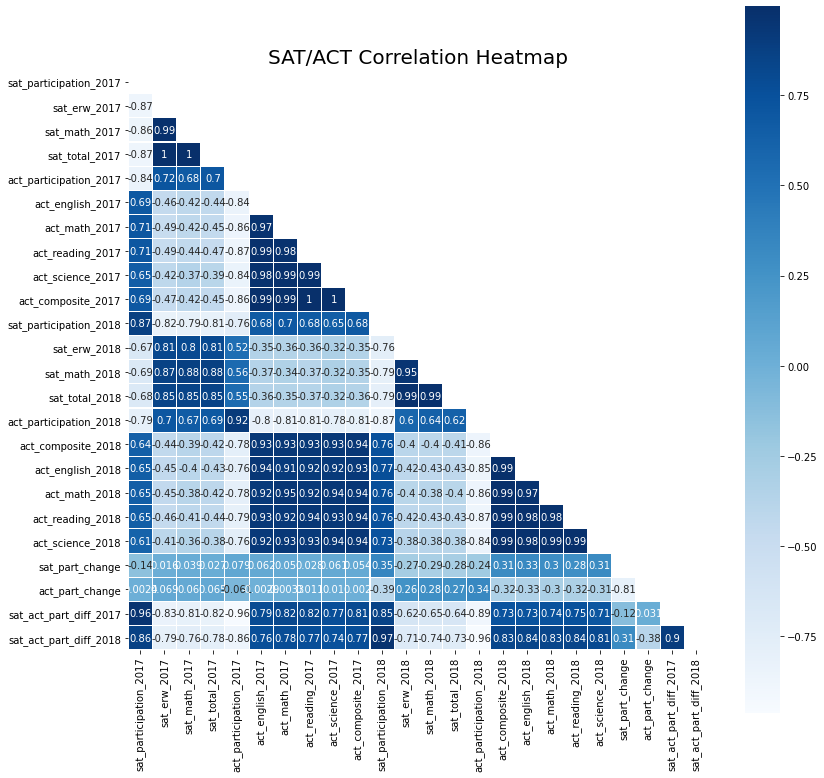

In [256]:
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True


# plot heatmap
plt.figure(figsize=(13,13))
sns.heatmap(final.corr(), mask=mask, cmap='Blues', linewidths=0.1, square=True, annot=True)
plt.title("SAT/ACT Correlation Heatmap",fontsize=20);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [257]:
# custom function for subplot histograms

def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,6)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=20) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i],fontsize=12)
        ax[i].set_xlabel(list_of_xlabels[i],fontsize = 12)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

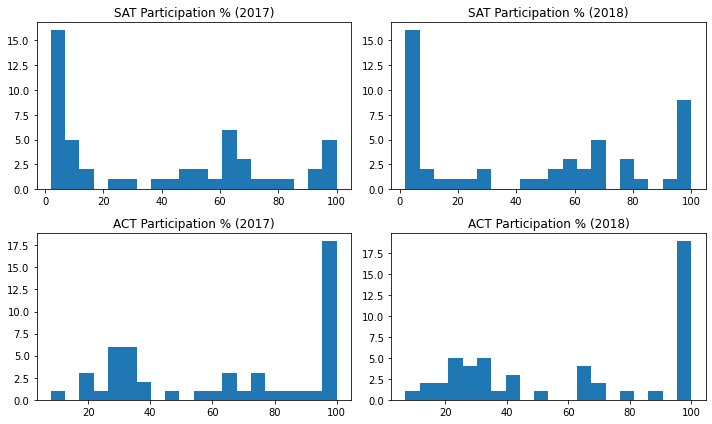

In [258]:
# histograms for participation rates for SAT and ACT
participation = ['sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2018']
titles = ['SAT Participation % (2017)','SAT Participation % (2018)','ACT Participation % (2017)','ACT Participation % (2018)']
xlabels = ['','','','']
subplot_histograms(final,participation,titles,xlabels)
plt.tight_layout()

The distribution of state participation rates for both SAT and ACT isn't normally distributed at all. There are more states on the lower extreme (<20%) for SAT participation rates and more states on the higher extreme (100%) for ACT participation rates. This holds true to what we found earlier that more states have made ACT mandatory than SAT.

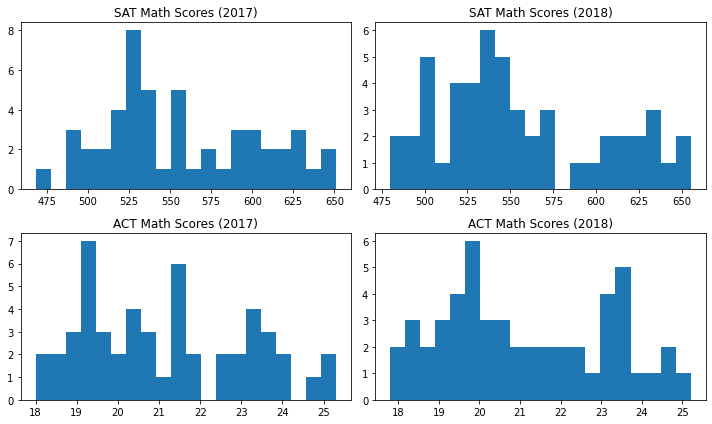

In [259]:
# histograms for math scores for SAT and ACT
math_scores = ['sat_math_2017','sat_math_2018','act_math_2017','act_math_2018']
titles = ['SAT Math Scores (2017)','SAT Math Scores (2018)','ACT Math Scores (2017)','ACT Math Scores (2018)']
xlabels = ['','','','']
subplot_histograms(final,math_scores,titles,xlabels)
plt.tight_layout()

The distribution of Math scores are not normal and are similiar for both SAT and ACT. Both shifted to the right slight from 2017 to 2018.

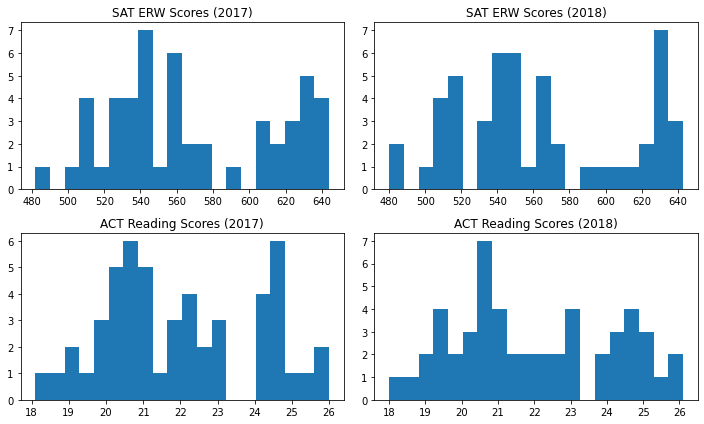

In [260]:
# histograms for reading/verbal scores for SAT and ACT
math_scores = ['sat_erw_2017','sat_erw_2018','act_reading_2017','act_reading_2018']
titles = ['SAT ERW Scores (2017)','SAT ERW Scores (2018)','ACT Reading Scores (2017)','ACT Reading Scores (2018)']
xlabels = ['','','','']
subplot_histograms(final,math_scores,titles,xlabels)
plt.tight_layout()

Similarly, the distribution for reading/verbal scores are not normal.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [261]:
# custom function for scatter plots
def scatterplot(df, col1, col2, title,color=None):
    sns.regplot(df[col1],df[col2],
                scatter_kws={'facecolors':color,'edgecolor':color},
                line_kws = {'color':'grey'})
    plt.title(title,fontsize=14)
    plt.xlabel(col1,fontsize=12)
    plt.ylabel(col2,fontsize=12)

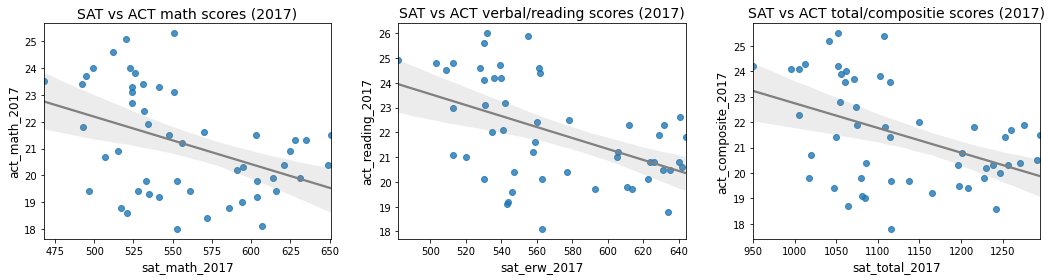

In [262]:
# scatter plots for 2017 SAT vs ACT scores (math, verbal/reading, total/composite)
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
# Scatterplot: SAT vs. ACT Math scores for 2017
scatterplot(final,'sat_math_2017','act_math_2017','SAT vs ACT math scores (2017)')
# Scatterplot: SAT vs. ACT ERW/Reading scores for 2017
plt.subplot(1,3,2)
scatterplot(final,'sat_erw_2017','act_reading_2017','SAT vs ACT verbal/reading scores (2017)')
# Scatterplot: SAT vs. ACT Total/Composite scores for 2017
plt.subplot(1,3,3)
scatterplot(final,'sat_total_2017','act_composite_2017','SAT vs ACT total/compositie scores (2017)')

plt.tight_layout()

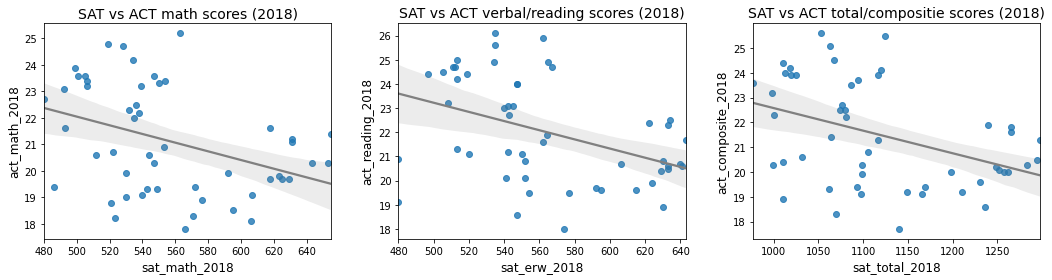

In [263]:
# extra scatter plots for 2018 SAT vs ACT scores (math, verbal/reading, total/composite)
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
# Scatterplot: SAT vs. ACT Math scores for 2018
scatterplot(final,'sat_math_2018','act_math_2018','SAT vs ACT math scores (2018)')
# Scatterplot: SAT vs. ACT ERW/Reading scores for 2018
plt.subplot(1,3,2)
scatterplot(final,'sat_erw_2018','act_reading_2018','SAT vs ACT verbal/reading scores (2018)')
# Scatterplot: SAT vs. ACT Total/Cmposite scores for 2018
plt.subplot(1,3,3)
scatterplot(final,'sat_total_2018','act_composite_2018','SAT vs ACT total/compositie scores (2018)')

plt.tight_layout()

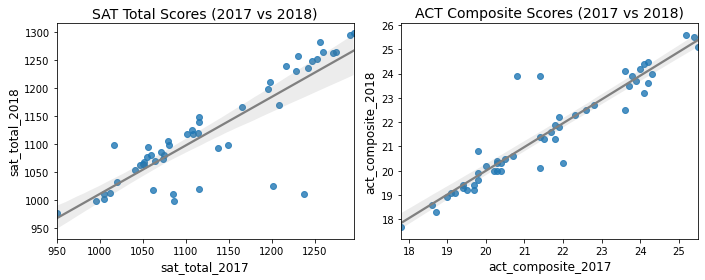

In [264]:
# scatter plots for total scores for SAT 2017 vs. 2018 and composite scores for ACT 2017 vs. 2018

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
# Scatterplot: SAT Total scores for 2017 vs 2018
scatterplot(final,'sat_total_2017','sat_total_2018','SAT Total Scores (2017 vs 2018)')
plt.subplot(1,2,2)
# Scatterplot: ACT Composite scores for 2017 vs 2018
scatterplot(final,'act_composite_2017','act_composite_2018','ACT Composite Scores (2017 vs 2018)')

plt.tight_layout()

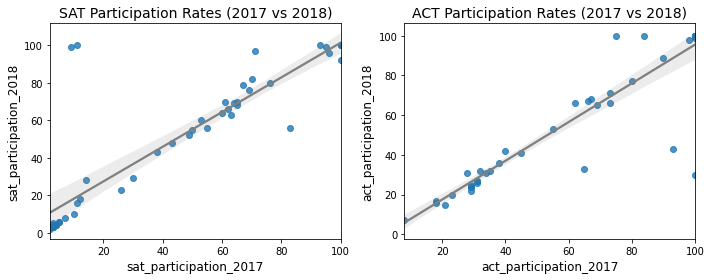

In [265]:
# scatter plots for SAT and ACT Participation Rates (2017 vs 2018)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
# Scatterplot: SAT Participation Rates for 2017 vs 2018
scatterplot(final,'sat_participation_2017','sat_participation_2018','SAT Participation Rates (2017 vs 2018)')
plt.subplot(1,2,2)
# Scatterplot: ACT Participation Rates for 2017 vs 2018
scatterplot(final,'act_participation_2017','act_participation_2018','ACT Participation Rates (2017 vs 2018)')

plt.tight_layout()

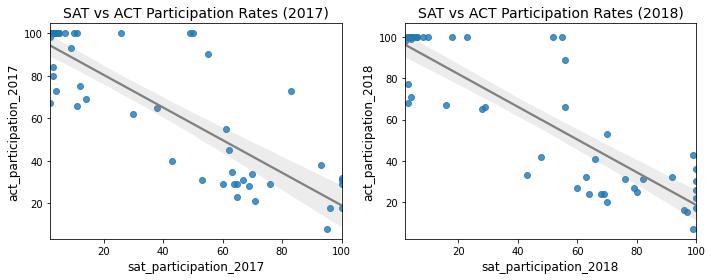

In [266]:
# scatter plots for SAT vs ACT Participation Rates 

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
# Scatterplot: SAT vs ACT Participation Rates for 2017
scatterplot(final,'sat_participation_2017','act_participation_2017','SAT vs ACT Participation Rates (2017)')
plt.subplot(1,2,2)
# Scatterplot: SAT vs ACT Participation Rates for 2018
scatterplot(final,'sat_participation_2018','act_participation_2018','SAT vs ACT Participation Rates (2018)')

plt.tight_layout()

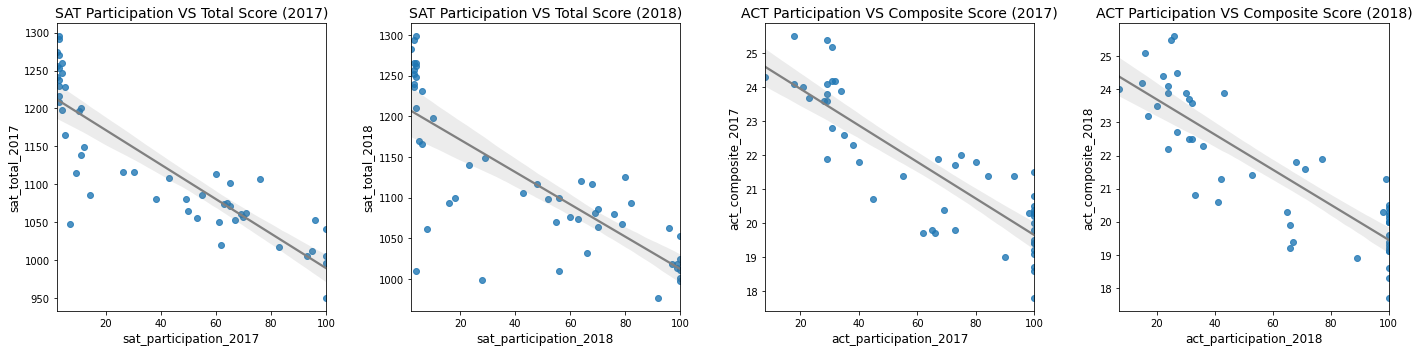

In [267]:
# extra scatter plots for SAT/ACT participation rates vs total/composite scores 

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
# Scatterplot: SAT Participation Rates vs SAT Total Score for 2017
scatterplot(final,'sat_participation_2017','sat_total_2017','SAT Participation VS Total Score (2017)')
plt.subplot(1,4,2)
# Scatterplot: SAT Participation Rates vs SAT Total Score for 2018
scatterplot(final,'sat_participation_2018','sat_total_2018','SAT Participation VS Total Score (2018)')
plt.subplot(1,4,3)
# Scatterplot: ACT Participation Rates vs ACT Composite Score for 2017
scatterplot(final,'act_participation_2017','act_composite_2017','ACT Participation VS Composite Score (2017)')
plt.subplot(1,4,4)
# Scatterplot: ACT Participation Rates vs ACT Composite Score for 2018
scatterplot(final,'act_participation_2018','act_composite_2018','ACT Participation VS Composite Score (2018)')

plt.tight_layout()

**Scatterplot Findings:** 

- Participation rates in 2017 are positively correlated with participation rates in 2018 for the same test.
- SAT participation is negatively correlated with ACT participation.
- Test scores in 2017 are positively correlated with test scores in 2018 for the same test.
- Participation rates are negatively correlated to test scores (total/composite) for both SAT and ACT. This means that states with mandatory participation in either tests have lower average scores. States with low partipication rates tend to send their best students and have highest scores. Hence there is bias in the scores.
- There is a weak negative correlation between scores of similar papers across both tests e.g. SAT math vs ACT math.



#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [268]:
# custom function to create sub
def boxplots(df, title, xlabel, ylabel, xticklabels):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
    for i in range(2):
        ax[i] = sns.boxplot(x = "variable", y = "value", data = pd.melt(df[i]), ax = ax[i])
        ax[i].set_title(title[i], fontsize = 16)
        ax[i].set_xlabel(xlabel[i], fontsize = 12)
        ax[i].set_ylabel(ylabel[i], fontsize = 12)
        ax[i].tick_params(axis="x", labelsize = 10, color = 'gray')
        ax[i].tick_params(axis="y", labelsize = 10, color = 'gray')
        ax[i].set_xticklabels(xticklabels)

# Reference:
# https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn

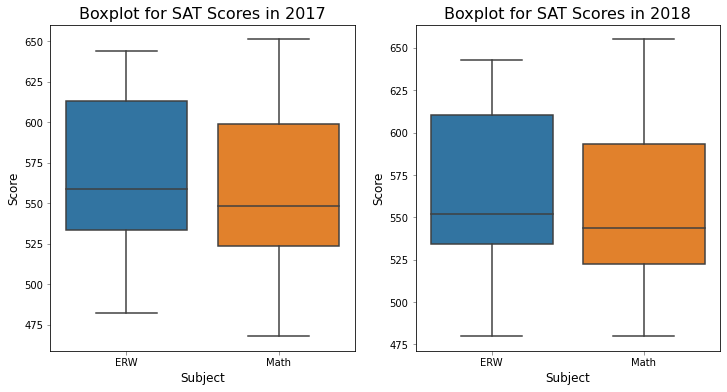

In [269]:
# boxplot for SAT Math and ERW score
boxplots([final[["sat_erw_2017","sat_math_2017"]], 
          final[["sat_erw_2018","sat_math_2018"]]],
             ["Boxplot for SAT Scores in 2017", "Boxplot for SAT Scores in 2018"],
             ["Subject", "Subject"], 
             ["Score","Score"], 
             ["ERW","Math"])

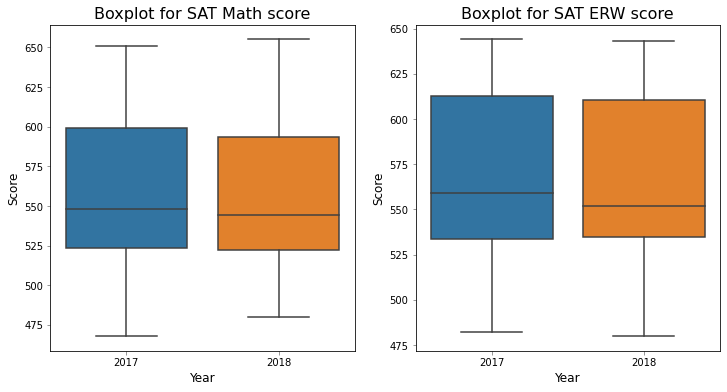

In [270]:
# boxplot for SAT Math and ERW score
boxplots([final[["sat_math_2017","sat_math_2018"]], final[["sat_erw_2017","sat_erw_2018"]]],
             ["Boxplot for SAT Math score", "Boxplot for SAT ERW score"],
             ["Year", "Year"], 
             ["Score","Score"], 
             ["2017","2018"])

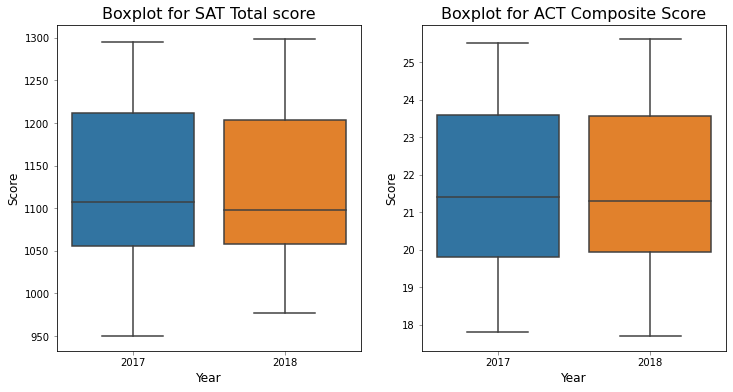

In [271]:
# boxplot for SAT Total and ACT Composite
boxplots([final[["sat_total_2017","sat_total_2018"]], final[["act_composite_2017","act_composite_2018"]]],
             ["Boxplot for SAT Total score", "Boxplot for ACT Composite Score"],
             ["Year", "Year"], 
             ["Score","Score"], 
             ["2017","2018"])

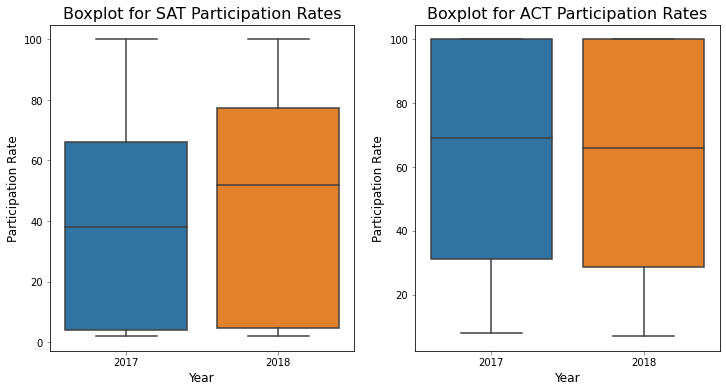

In [272]:
# boxplot for SAT and ACT Participation Rates
boxplots([final[["sat_participation_2017","sat_participation_2018"]], final[["act_participation_2017","act_participation_2018"]]],
             ["Boxplot for SAT Participation Rates", "Boxplot for ACT Participation Rates"],
             ["Year", "Year"], 
             ["Participation Rate","Participation Rate"], 
             ["2017","2018"])

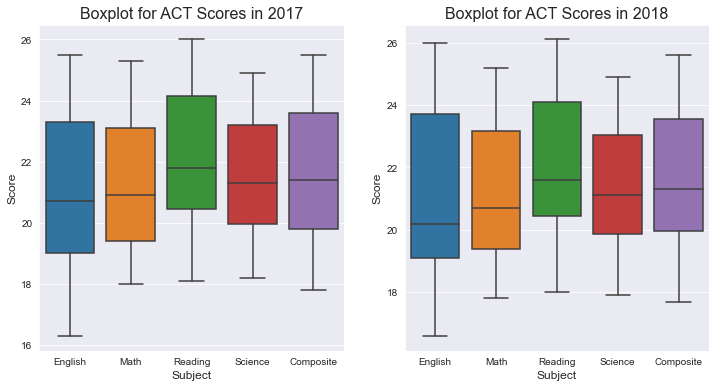

In [282]:
# boxplot for ACT papers
boxplots([final[["act_english_2017","act_math_2017","act_reading_2017","act_science_2017","act_composite_2017"]], 
          final[["act_english_2018","act_math_2018","act_reading_2018","act_science_2018","act_composite_2018"]]],
             ["Boxplot for ACT Scores in 2017", "Boxplot for ACT Scores in 2018"],
             ["Subject", "Subject"], 
             ["Score","Score"], 
             ["English","Math","Reading","Science","Composite"])

**Boxplot Findings:**

The SAT score range for both ERW and Math were similiar from 2017 to 2018. Comparing between papers, ERW has a wider range and the scores are higher than Math.

The ACT score range for Engligh, Math, Reading and Science were also similiar from 2017 to 2018. ACT Engligh has the widest range of scores with the lowest median while ACT Reading has the highest median.

The median and range for SAT participation rates increased from 2017 to 2018 while the participation rates for ACT remained roughly the same. Comparing between both tests, SAT has a significantly lower range and median for participation rates than ACT. This is in line with our previous findings that more states had higher participation rates for ACT than SAT.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Exploring if there are geographical differences in SAT and ACT scores. Based on this [source](https://www.geographyrealm.com/how-many-states-are-along-the-east-and-west-coasts/), there are 15 states along the coast of the US: Maine, New Hampshire, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Pennsylvania, Delaware, Maryland, Virginia, North Carolina, South Carolina, Georgia, Florida, California, Oregon, and Washington

In [440]:
# create coastal states list
coastal_states = ['Maine','New Hampshire','Massachusetts','Rhode Island','Connecticut','New York','New Jersey',\
                  'Pennsylvania','Delaware','Maryland','Virginia','North Carolina','South Carolina','Georgia',\
                  'Florida', 'California', 'Oregon', 'Washington']

coastal_states

['Maine',
 'New Hampshire',
 'Massachusetts',
 'Rhode Island',
 'Connecticut',
 'New York',
 'New Jersey',
 'Pennsylvania',
 'Delaware',
 'Maryland',
 'Virginia',
 'North Carolina',
 'South Carolina',
 'Georgia',
 'Florida',
 'California',
 'Oregon',
 'Washington']

In [436]:
# find states with < 99% ACT and SAT participation 
final_99 = final[(final['act_participation_2018'] < 99) & (final['sat_participation_2018'] < 99)].loc[:,['sat_participation_2018']]

In [441]:
#final_99['is_coastal'] = pd.DataFrame(final_99.index.isin(coastal_states))
#skipping this portion as I'm running out of time but the idea is to find the states along the coast with
#low SAT participation rates. used Tableau instead for a quick viz under "outside research" instead

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [432]:
# export final dataframe to csv for Tableau
final.to_csv('final_sat_act.csv')

Using Tableau to create choropleth maps for participation rates, it seems that coastal states have higher SAT participation rates while inland states have higher ACT participation rates. We will have to explore further on the geographical and political nuances in the US to dig deeper in this trend.

<img src="assets/2017_map.png">
<img src="assets/2018_map.png">

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [430]:
# summary statistics
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_erw_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No. Looking at the histograms plotted above, it does not appear that any of these varaibles follows a normal distribution.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: Based on Central Limit Theorem (CLT), the margin of error decreases as sample size increases, no matter the shape of the population distribution. However, there are biases in our datasets. 

Our data shows a wide range of participation rates with peaks near 0 and 100% and there is a negative correlation between participation rates and test scores. This means that comparing scores across states, even for the same tests, isn’t reliable because the average scores are biased by participation rates. The score avergaes from high participation rates states cannot be compared to the score averages from low participation rates.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: No. As participation rates don't appear to follow a normal distribution, statistical inference comparisons between the two variables are not valid.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No. Math scores are calculated using different methodologies and scoring for SAT and ACT. The sample size of the students taking these tests also greatly varies from state to state.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Adding in Tableau graphs from "assets/SAT_ACT.twbx" which were plotted for the presentation:

<img src="assets/sat_increase.png" width="700" height="400" align="left">
<img src="assets/sat_decrease.png" width="600" height="400" align="left">

The 3 states I've chosen to look deeper into are Colorado, Illinois and Florida as they had the greatest change in SAT participation rates from 2017 to 2018. 

Illinois and Colorado saw significant increases in SAT participation rates of 90pp and 89pp respectively. From these sources for [Illionis](https://www.testive.com/illinois/) and [Colorado](https://www.testive.com/colorado-sat-change-2017/), SAT has become mandatory for both states which explains the spike in participation rates.

<img src="assets/colorado_illinois_scores.png" width="400" height="300" align="left">
<img src="assets/florida_scores.png" width="400" height="300" align="left">

Florida is worth looking into as participation rates fell for both SAT and ACT. While I couldn't find any info on the potential reason(s) behind it, it's worth looking into the effect these changes in participation on test scores.

From the tables above, Colorado and Illinois saw a decrease in test scores and Florida saw an increase in test scores. "Participation rate has a huge impact on state average SAT / ACT scores. In any state, the top students on the SAT/ACT are those most eager to take it, so states with low participation rates have artificially higher SAT / ACT scores." [(Source)](https://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate). The scatterplots above further confirms the negative correlation between participation rates and test scores.

<img src="assets/inland_sat_act.png" width="900" height="700" align="left">

Additionally, it may be worth looking into inland states with low SAT and ACT participation like Oregon and California. As ACT is not mandatory in these states, there is a potential opportunity to increase participation rates in these states. However, more research and analysis needs to be done in this area.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

**Key Takeaways:**
- Participation rates are heavily influenced by state contracts 
- Participation rates between SAT and ACT are negatively correlated. High participation rates in one test usually means low participation in the other i.e. students usually choose either test.
- Participation rates are negatively correlated to test scores. The higher the participation rates, the lower the scores and vice versa.
- SAT is generally more popular along the coast than in inland states.

**Recommendations:**
- Partnering with states to make SAT mandatory (like in the case of Colorado, Illinois).
- Target states with no mandatory ACT testing AND low SAT participation rates.
- Reducing barriers for SAT e.g. making it more accessible to low income groups by providing fee waivers, free online test practise material, SAT school day as part of school curriculum.

**Additional Data That Would Be Helpful:**
- Historical data before 2017 to understand trends over time.
- State statistics that may be a factor to participation rates e.g. income, population density, race.
- Participation rates and scores by city/district/school so that we can drill deeper to identify areas of focus.


